<a href="https://colab.research.google.com/github/Nourbh17/Meal-Detection-and-calories-Estimation-ComputerVision/blob/main/DetectionwithYolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Jun 29 12:51:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLOv8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 532, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'train', 'benchmark', 'val', 'predict', 'export', 'track'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'segment', 'detect', 'classify', 'obb', 'pose'}
                MODE (required) is one of {'train', 'benchmark', 'val', 'predict', 'export', 'track'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
from ultralytics import YOLO

from IPython.display import Image, display

In [ ]:
%cd {HOME}

[Errno 2] No such file or directory: '{HOME}'
/content


#Dataset (annotated and ready) :

In [ ]:
path ='/content/drive/MyDrive/ProjectInternship/dataset_fruits.yolov8'

In [ ]:
# define number of classes based on YAML
import yaml
with open(path + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
print(f'Number of classes: ',num_classes)

Number of classes:  8


In [ ]:
file_path = "/content/drive/MyDrive/ProjectInternship/classes.names.txt"
classes = []
with open(file_path,"r") as f:
    classes = [line.strip() for line in f.readlines()]

i=0
for c in classes:
    print(f"{i}.{c}",end=" ")
    i+=1

0.Apple 1.Banana 2.Carrot 3.Onion 4.Orange 5.Qiwi 6.Tomato 7.thumb 

#Train Model (YOLOv8) :

In [ ]:
# !yolo task=detect mode=train model=yolov8s.pt data={path}/data.yaml epochs=100 imgsz=800
!yolo task=detect mode=train model=yolov8s.pt data={path}/data.yaml epochs=100 imgsz=800 project='/content/drive/MyDrive/ProjectInternship'


100% 21.5M/21.5M [00:00<00:00, 246MB/s]
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/ProjectInternship/dataset_fruits.yolov8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/ProjectInternship, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

In [ ]:
!ls '/content/drive/MyDrive/ProjectInternship/train/'

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1719746914.efd5ab210106.3700.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch4320.jpg  weights
P_curve.png					    train_batch4321.jpg
PR_curve.png					    train_batch4322.jpg


#Some Results :

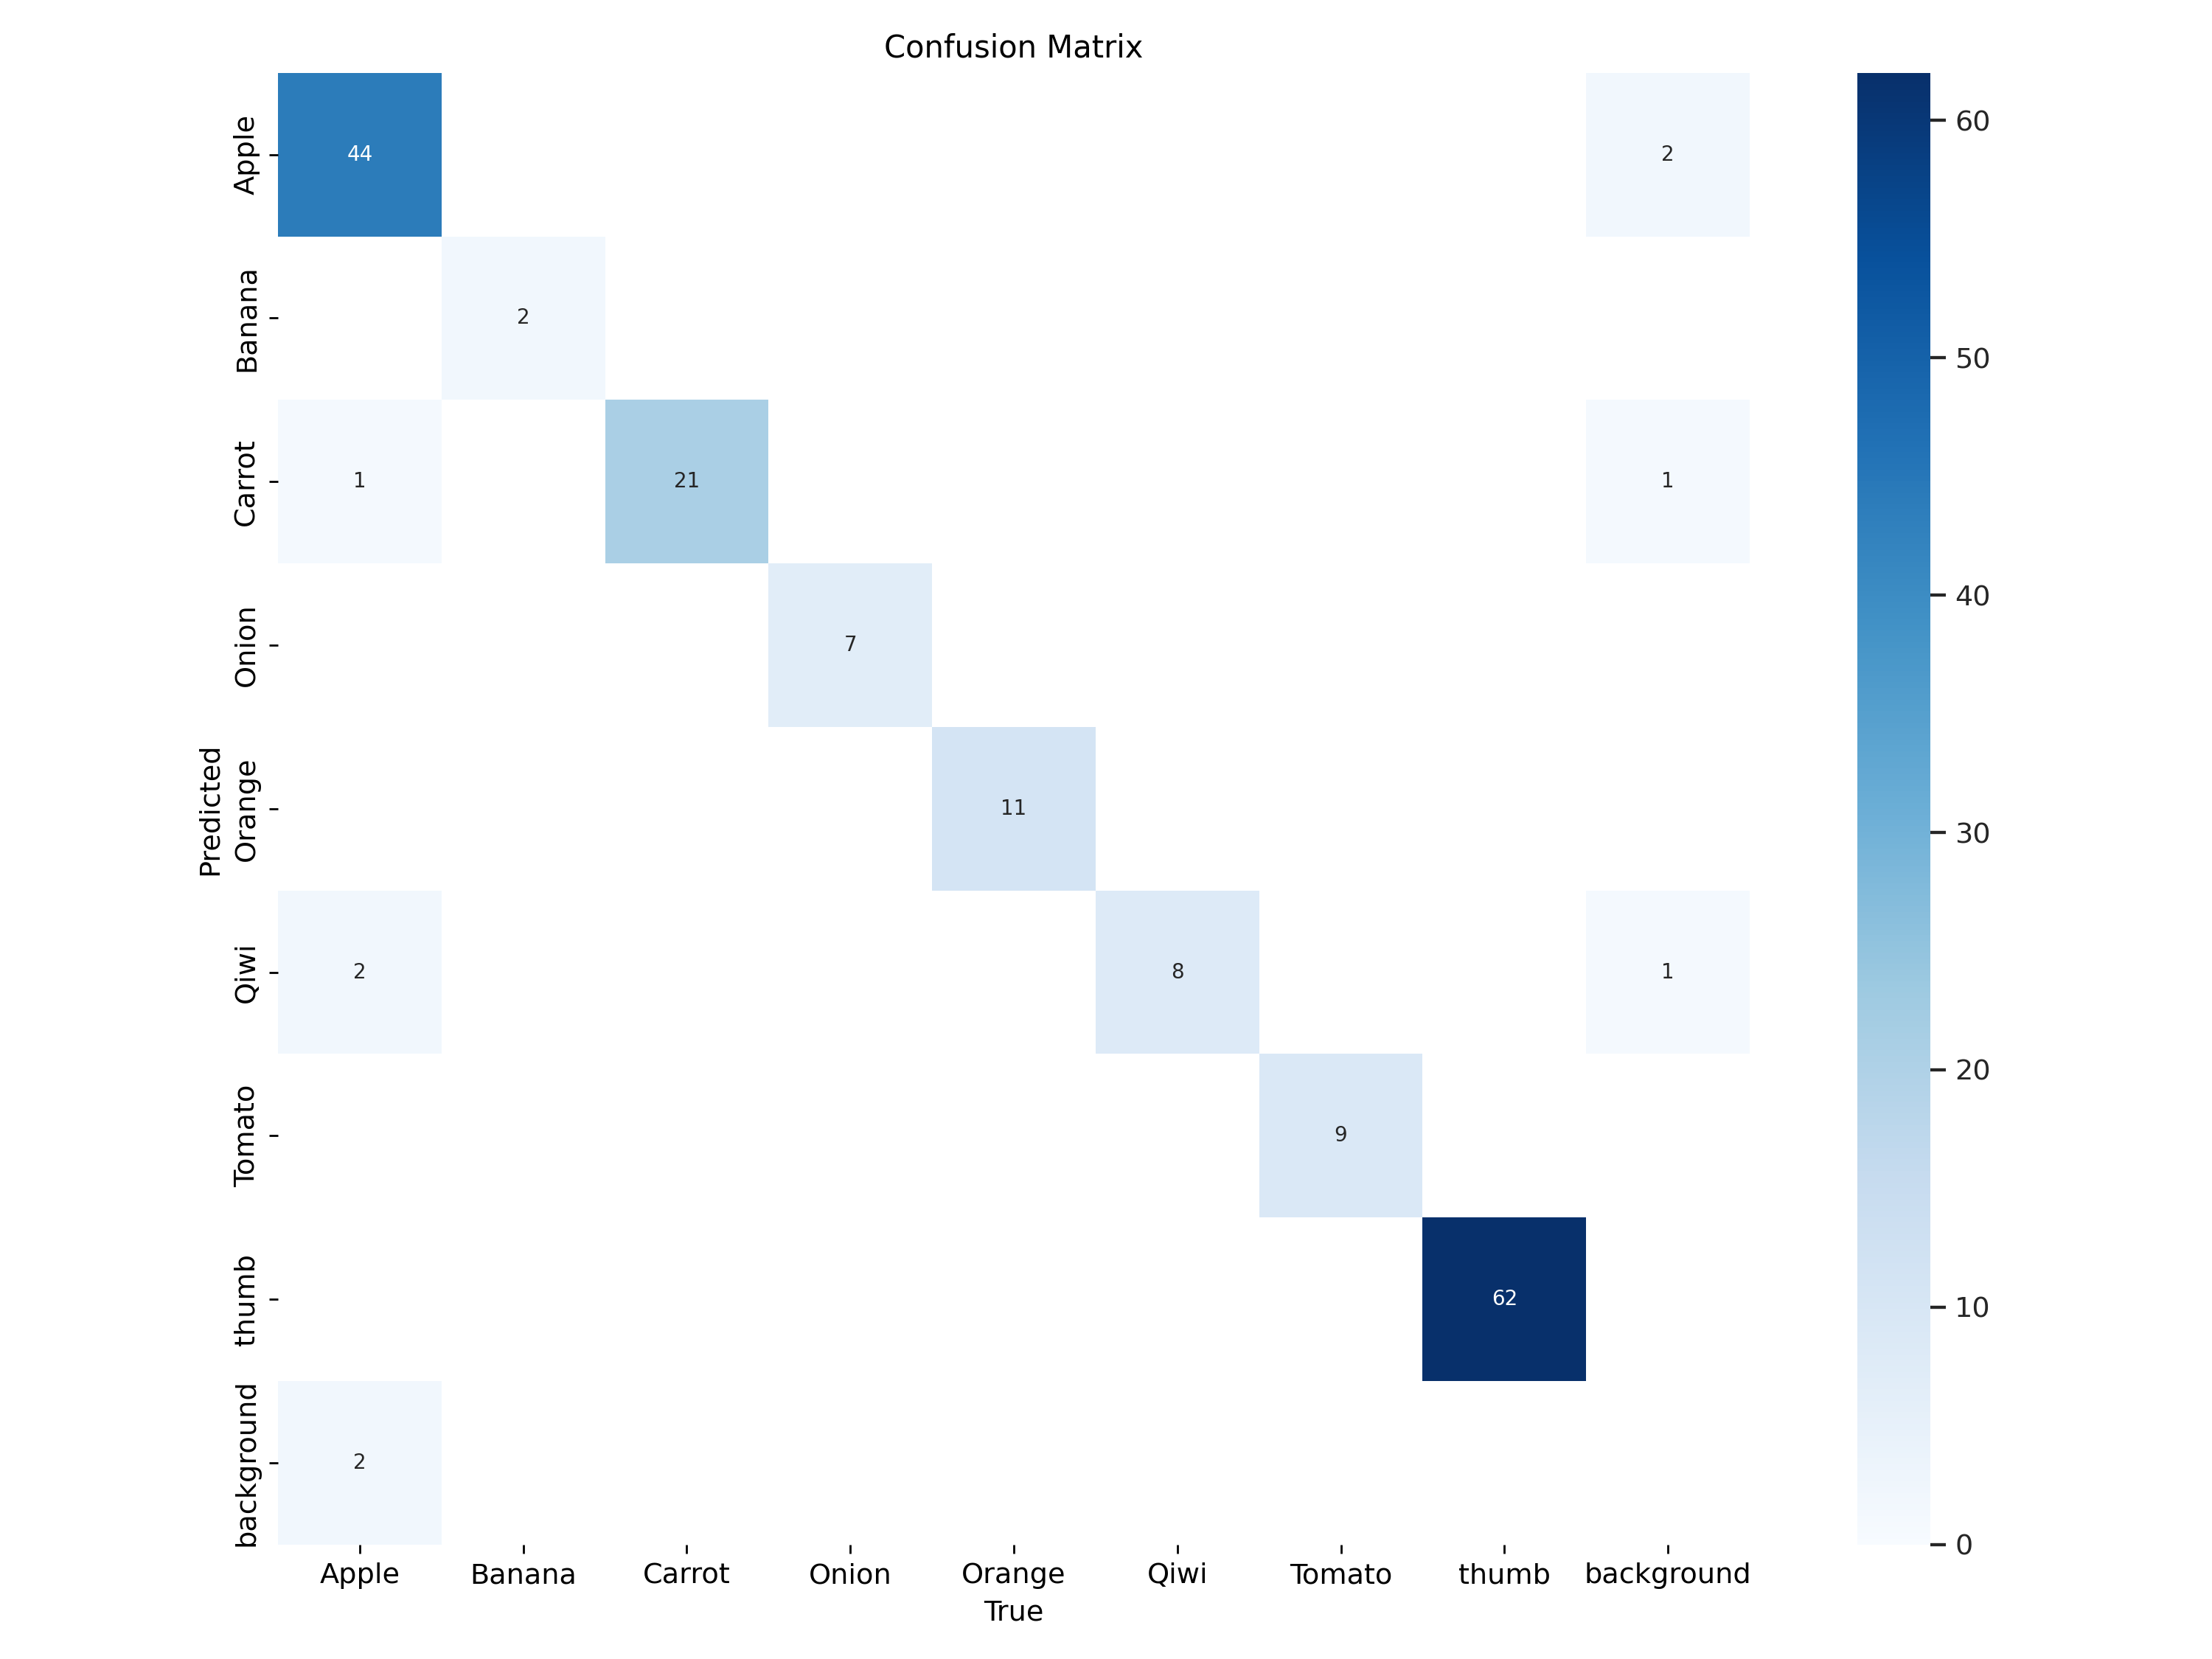

In [ ]:
Image(filename=f'/content/drive/MyDrive/ProjectInternship/train/confusion_matrix.png', width=600)

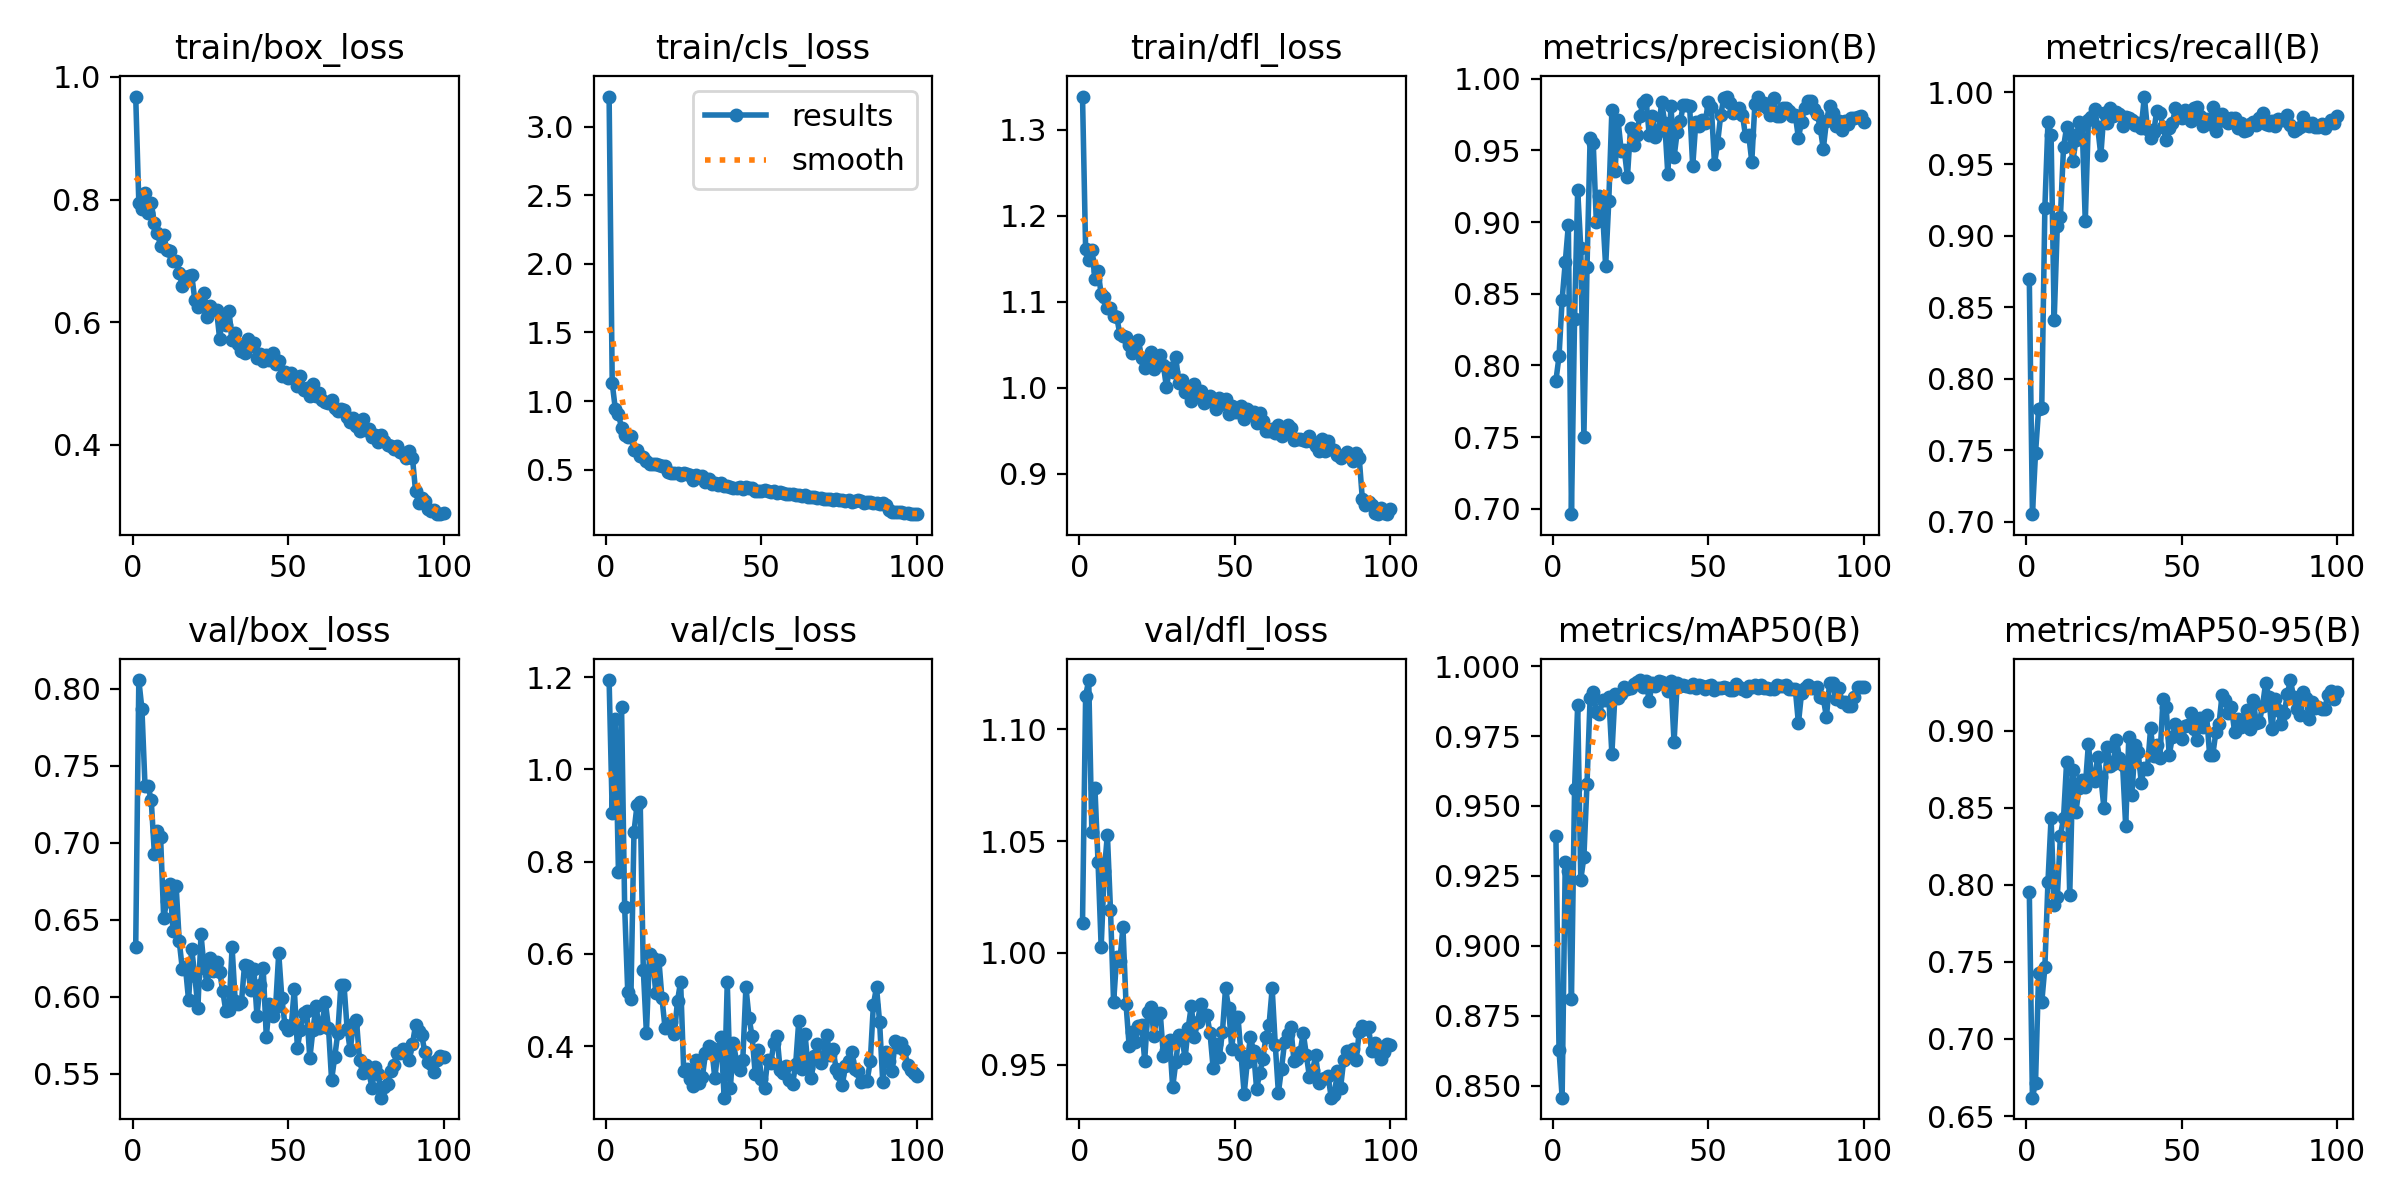

In [ ]:
Image(filename=f'/content/drive/MyDrive/ProjectInternship/train/results.png', width=600)

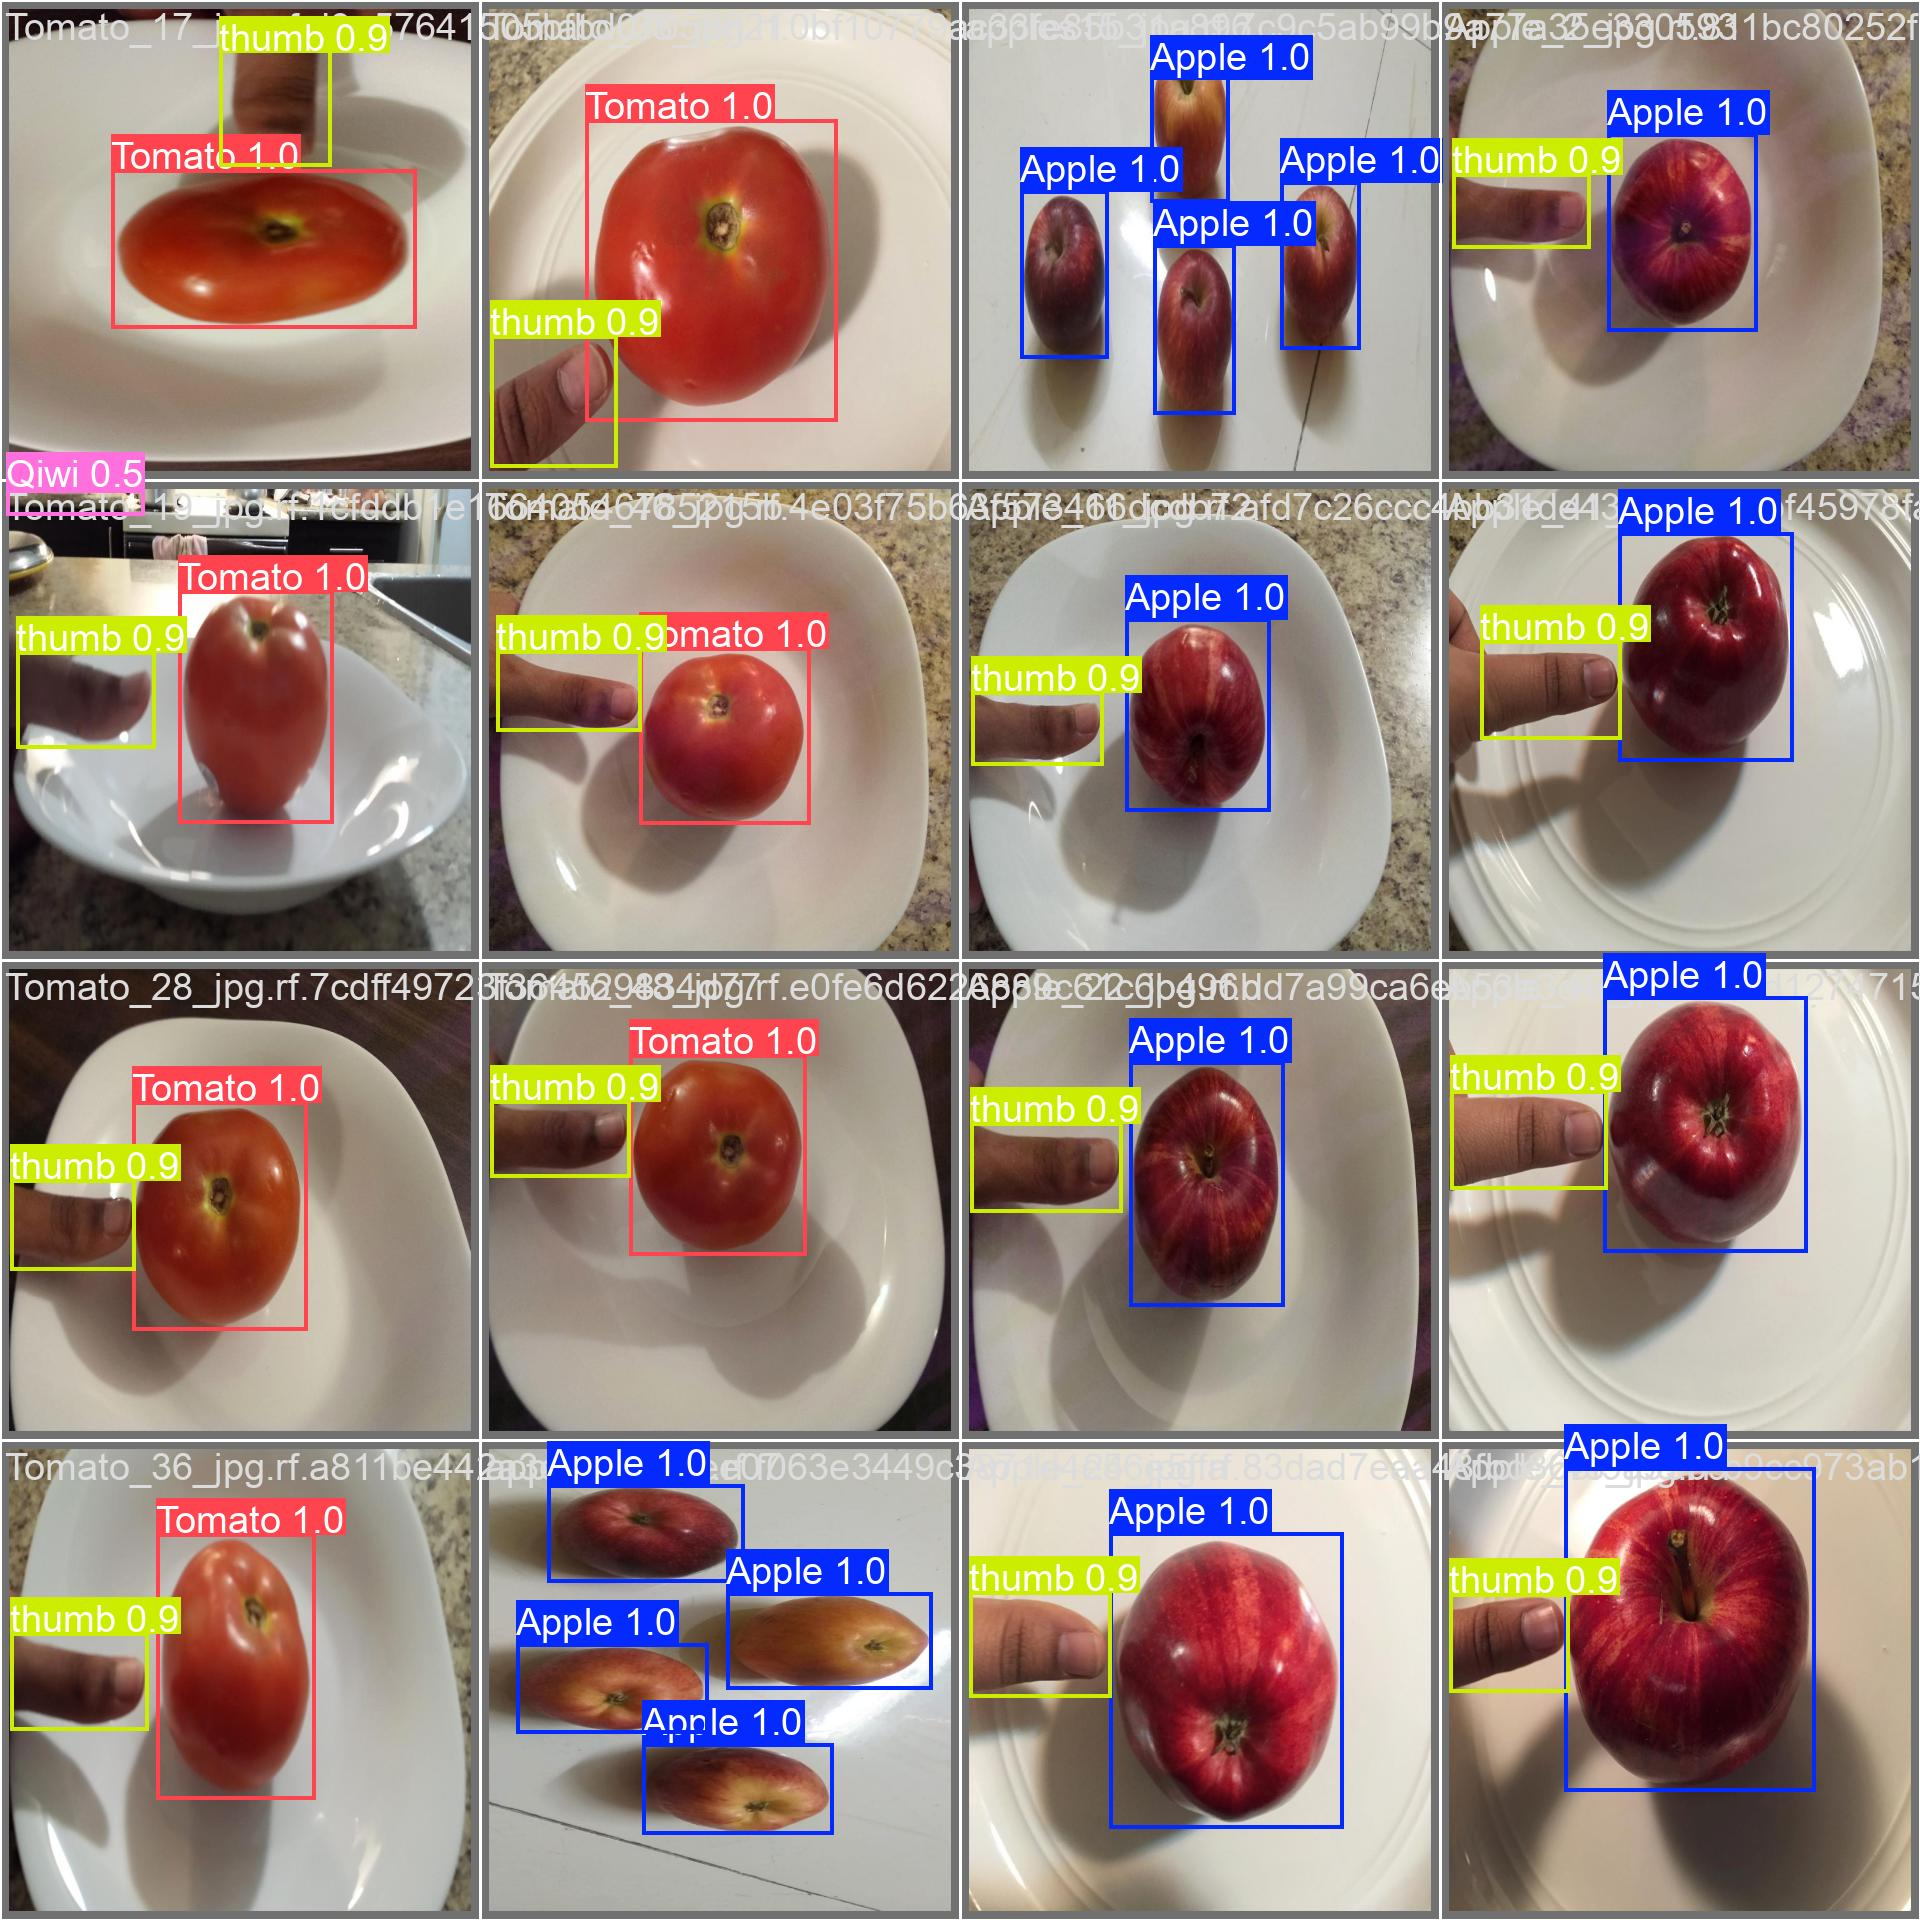

In [ ]:
Image(filename=f'/content/drive/MyDrive/ProjectInternship/train/val_batch0_pred.jpg', width=600)

#Validate Custom Model

In [ ]:
!yolo task=detect mode=val model='/content/drive/MyDrive/ProjectInternship/train/weights/best.pt' data={path}/data.yaml project='/content/drive/MyDrive/ProjectInternship'



Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/MyDrive/ProjectInternship/dataset_fruits.yolov8/valid/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100% 68/68 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:06<00:00,  1.25s/it]
                   all         68        169      0.975      0.977      0.992      0.929
                 Apple         25         49          1      0.864      0.974      0.934
                Banana          2          2      0.976          1      0.995      0.995
                Carrot          6         21          1       0.97      0.995      0.888
                 Onion          7          7      0.985          1      0.995      0.971
                Orange         11         11      0.991          1      0.995      0.957
          

# Inference with Custom Model


In [ ]:
!yolo task=detect mode=predict model='/content/drive/MyDrive/ProjectInternship/train/weights/best.pt' conf=0.25 source='/content/drive/MyDrive/ProjectInternship/dataset_fruits.yolov8/test/images' project='/content/drive/MyDrive/ProjectInternship'


Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

image 1/29 /content/drive/MyDrive/ProjectInternship/dataset_fruits.yolov8/test/images/Apple_27_jpg.rf.29688965e78d5d2dc6b93a6ec27ce53b.jpg: 800x800 1 Apple, 1 thumb, 22.6ms
image 2/29 /content/drive/MyDrive/ProjectInternship/dataset_fruits.yolov8/test/images/Apple_3_jpg.rf.2476d6f1698c5ecb09f56acff2d7b807.jpg: 800x800 1 Apple, 1 thumb, 22.6ms
image 3/29 /content/drive/MyDrive/ProjectInternship/dataset_fruits.yolov8/test/images/Apple_42_jpg.rf.2aba5e914b541bfb08afc57848f5a7fd.jpg: 800x800 1 Apple, 1 thumb, 22.6ms
image 4/29 /content/drive/MyDrive/ProjectInternship/dataset_fruits.yolov8/test/images/Apple_58_jpg.rf.8dad125130c22b1957be79b7ecc2e55c.jpg: 800x800 1 Apple, 1 thumb, 22.5ms
image 5/29 /content/drive/MyDrive/ProjectInternship/dataset_fruits.yolov8/test/images/Apple_62_jpg.rf.8f760e4616e10eb546a5de12d680f7d5.jpg: 

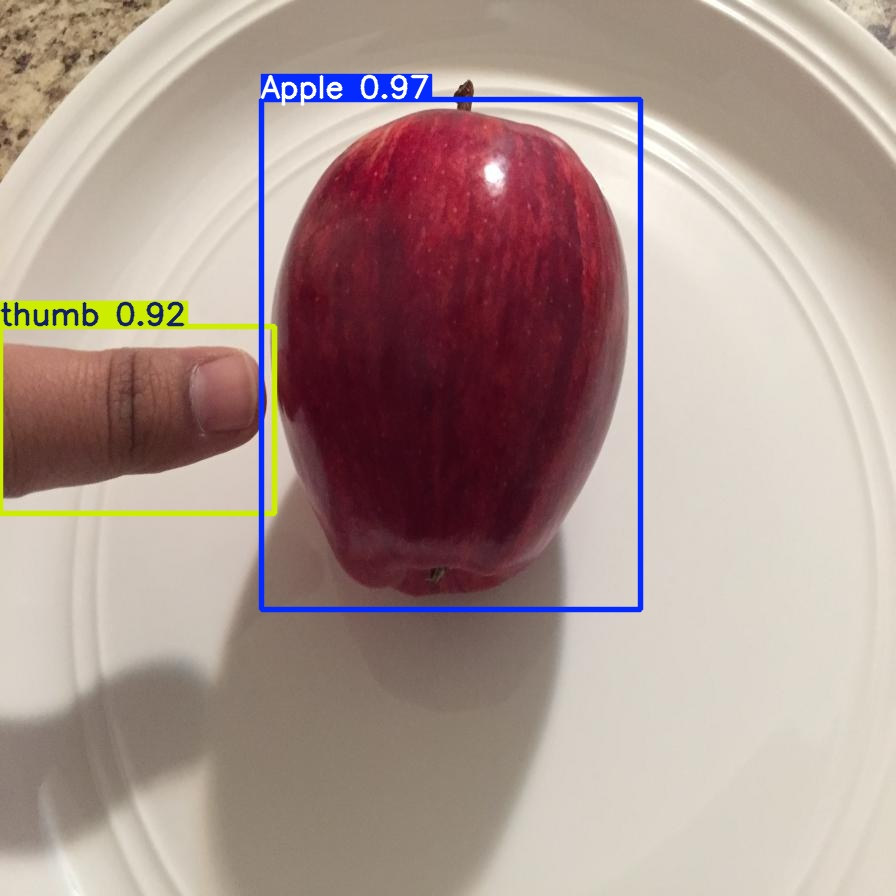

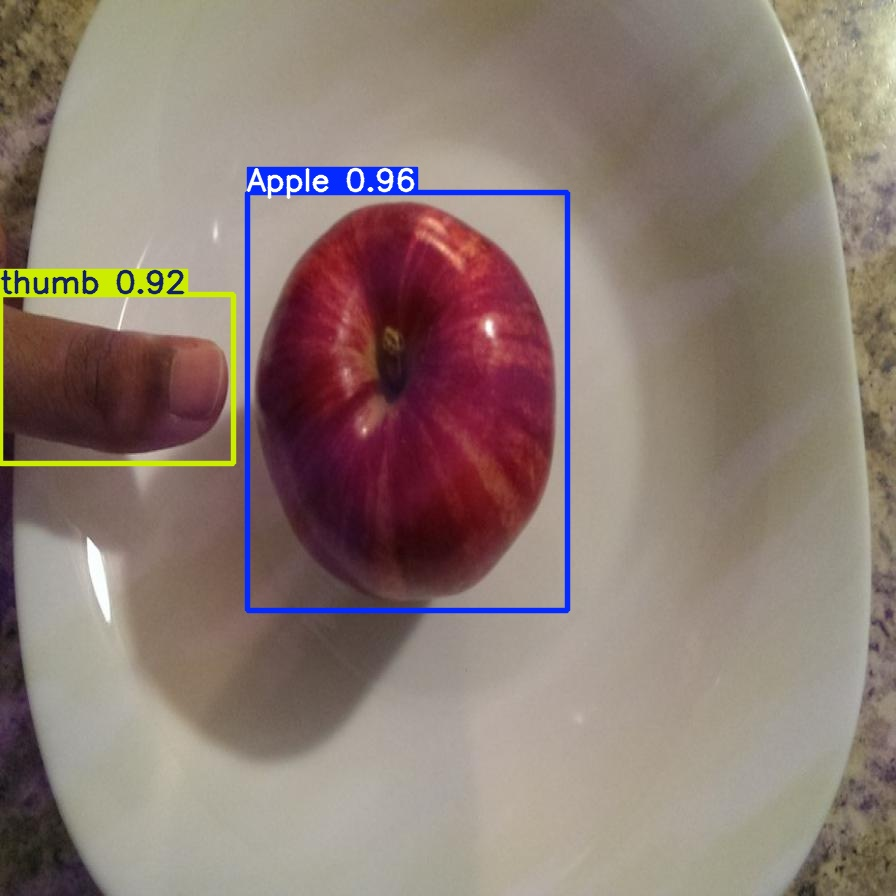

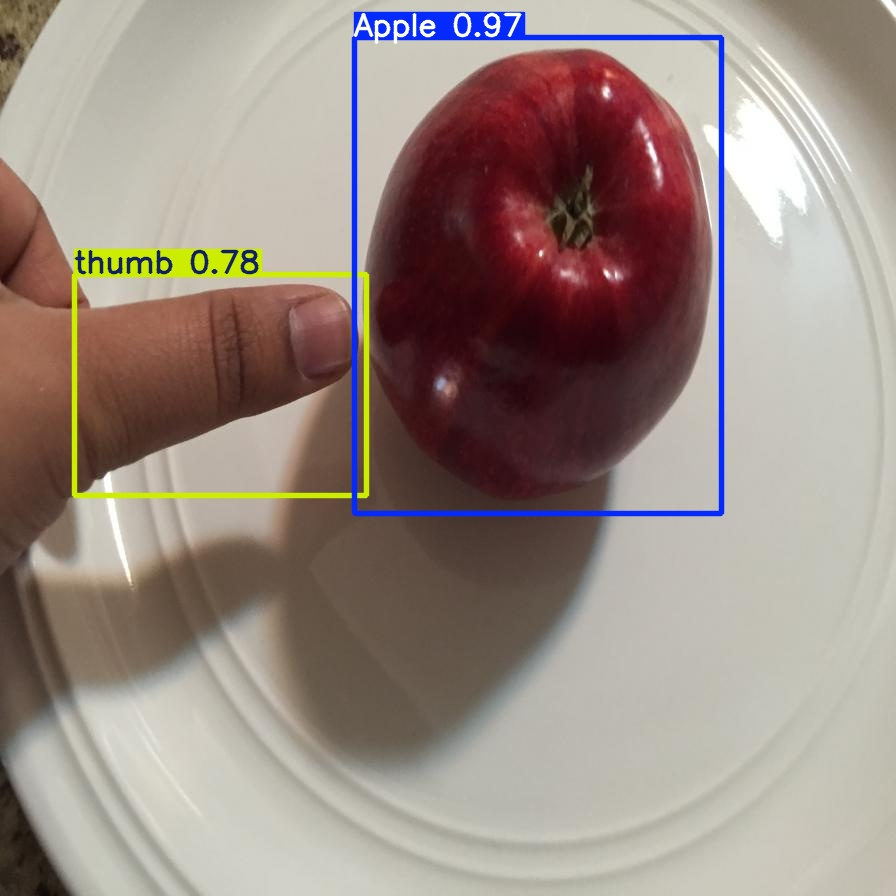

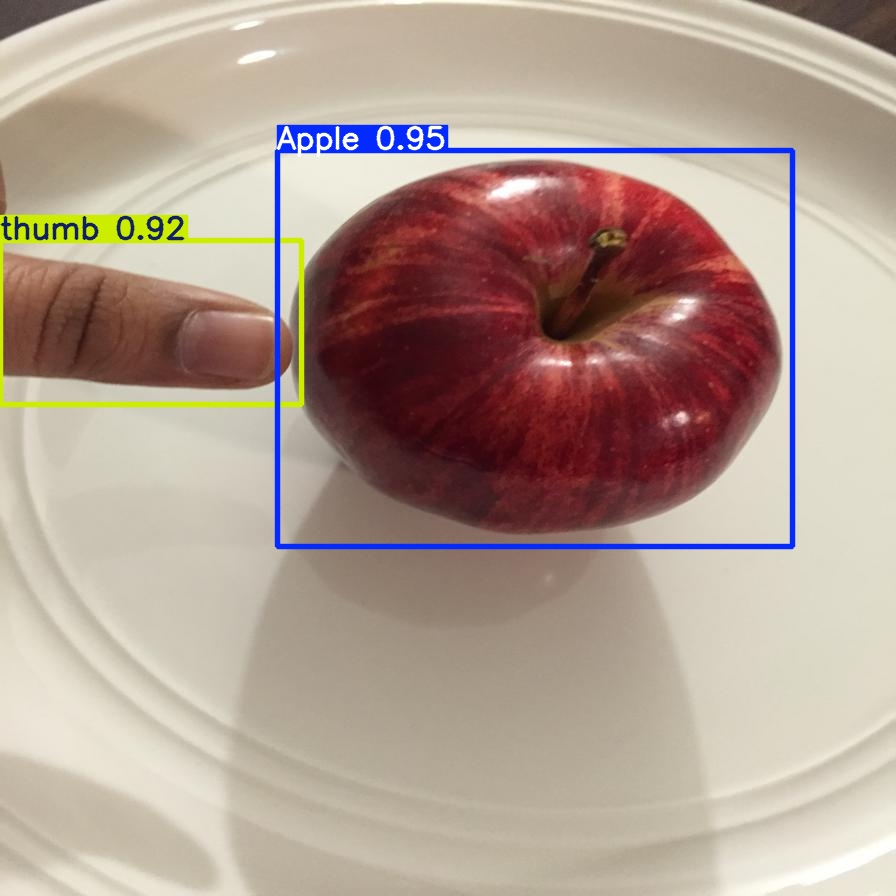

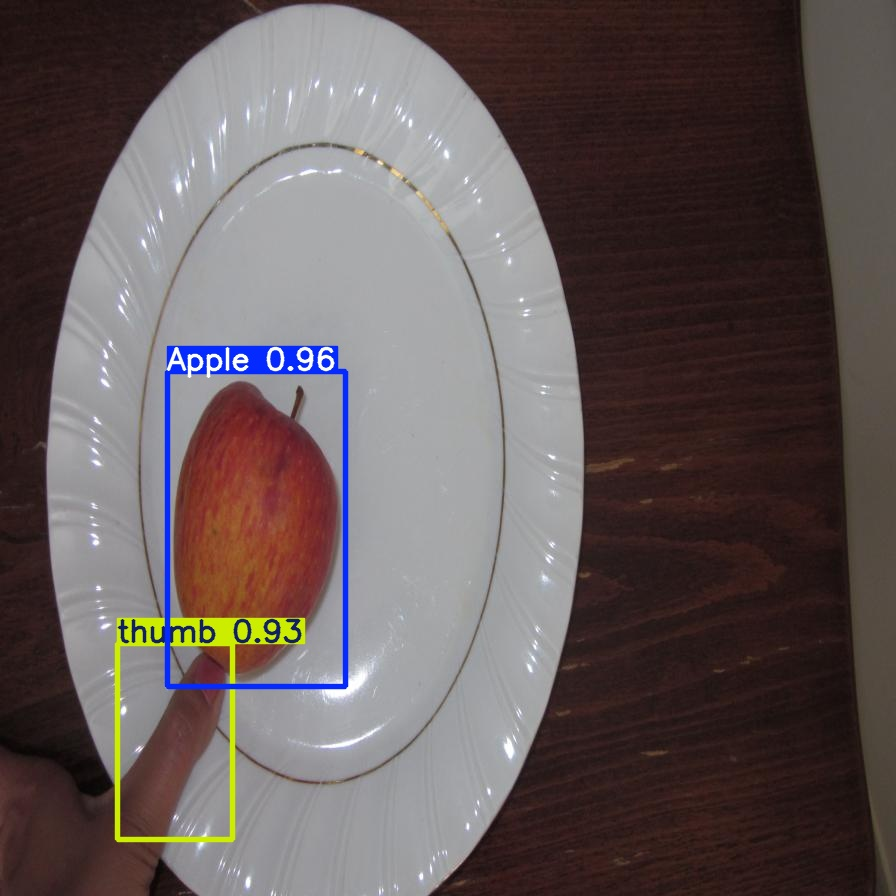

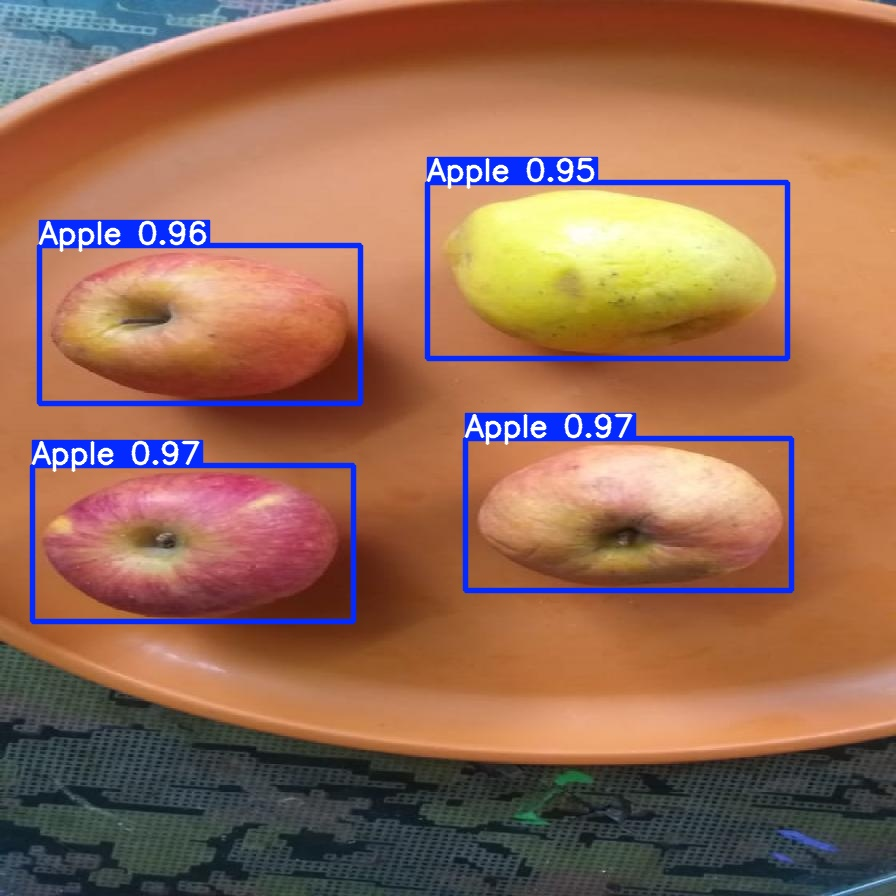

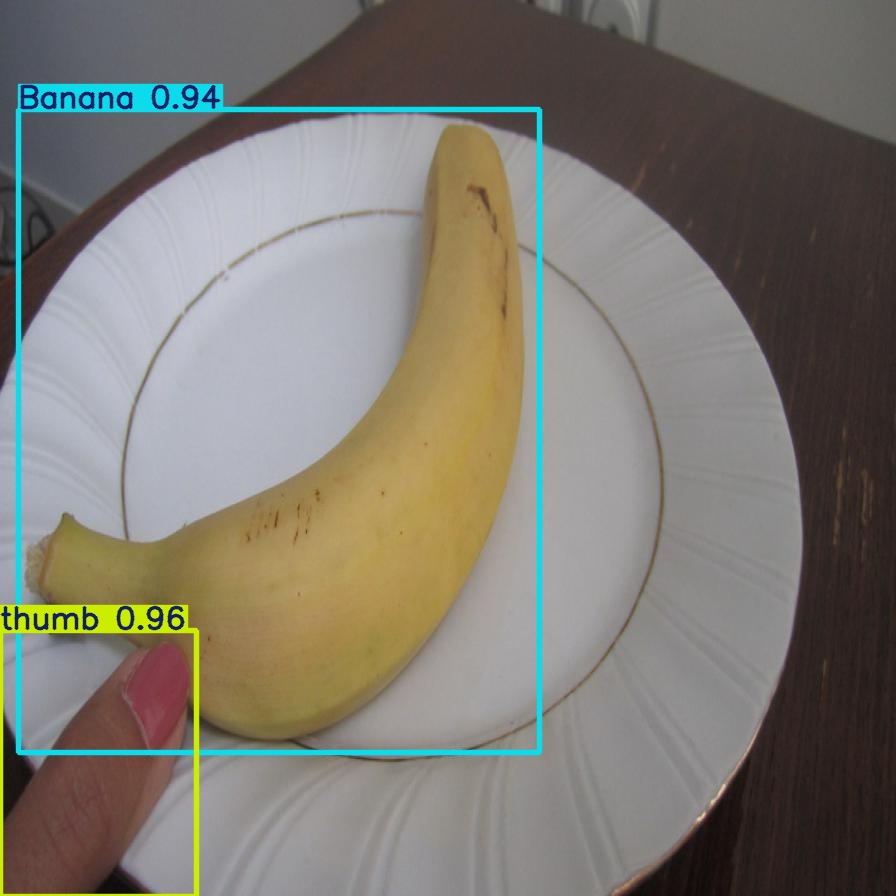

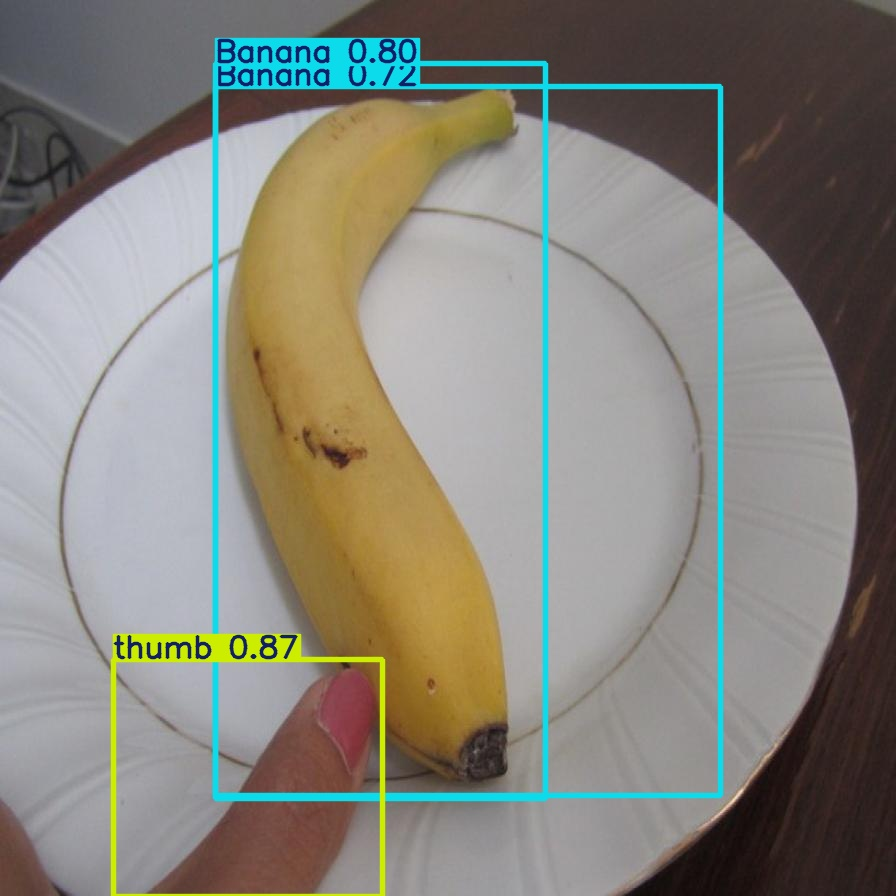

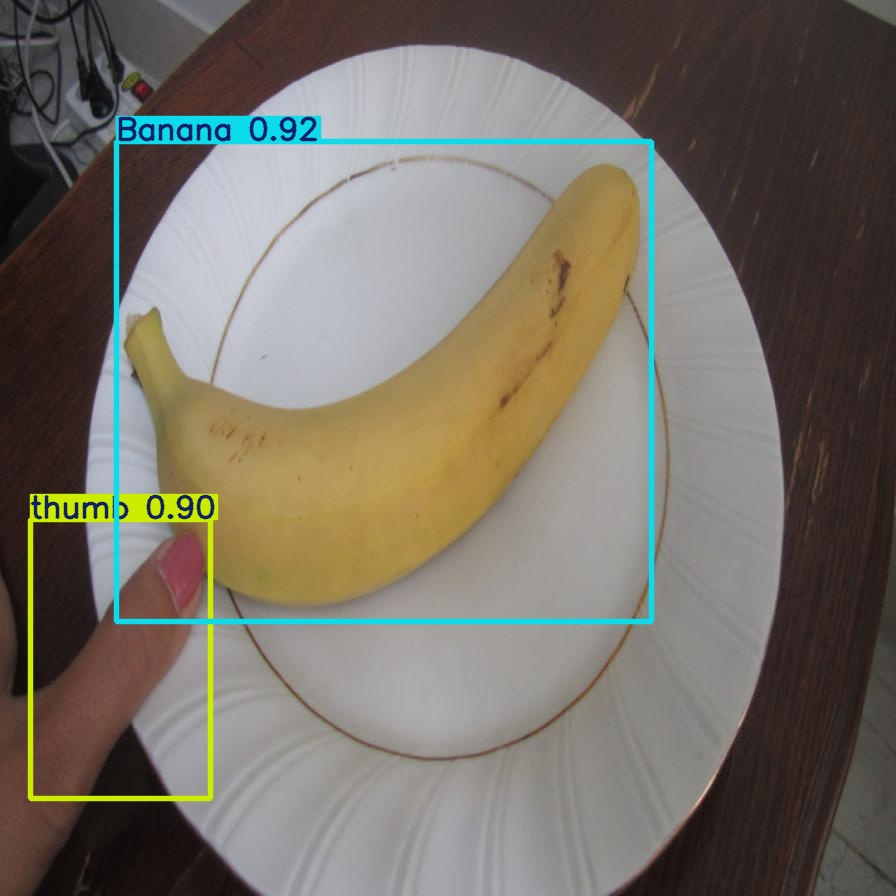

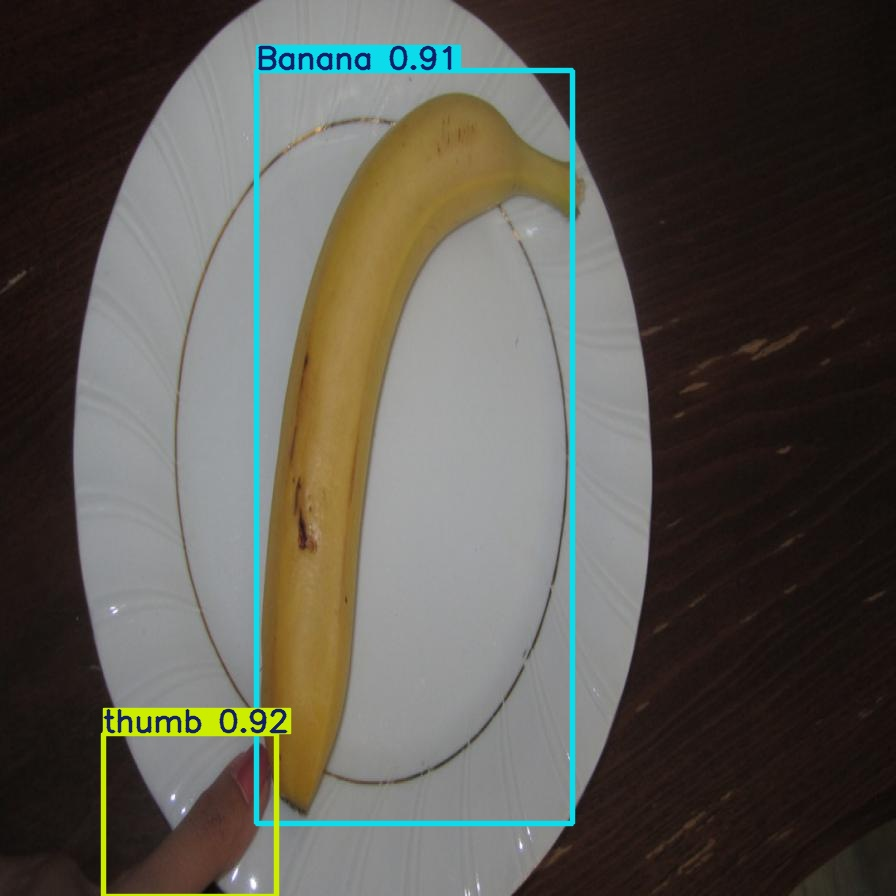

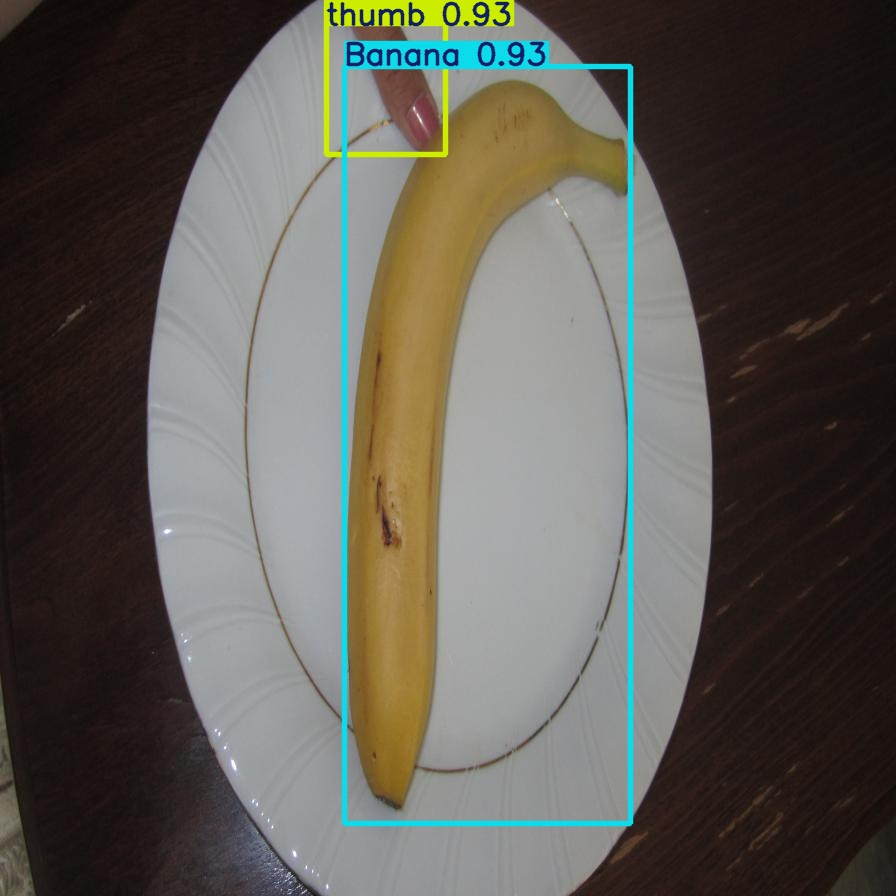

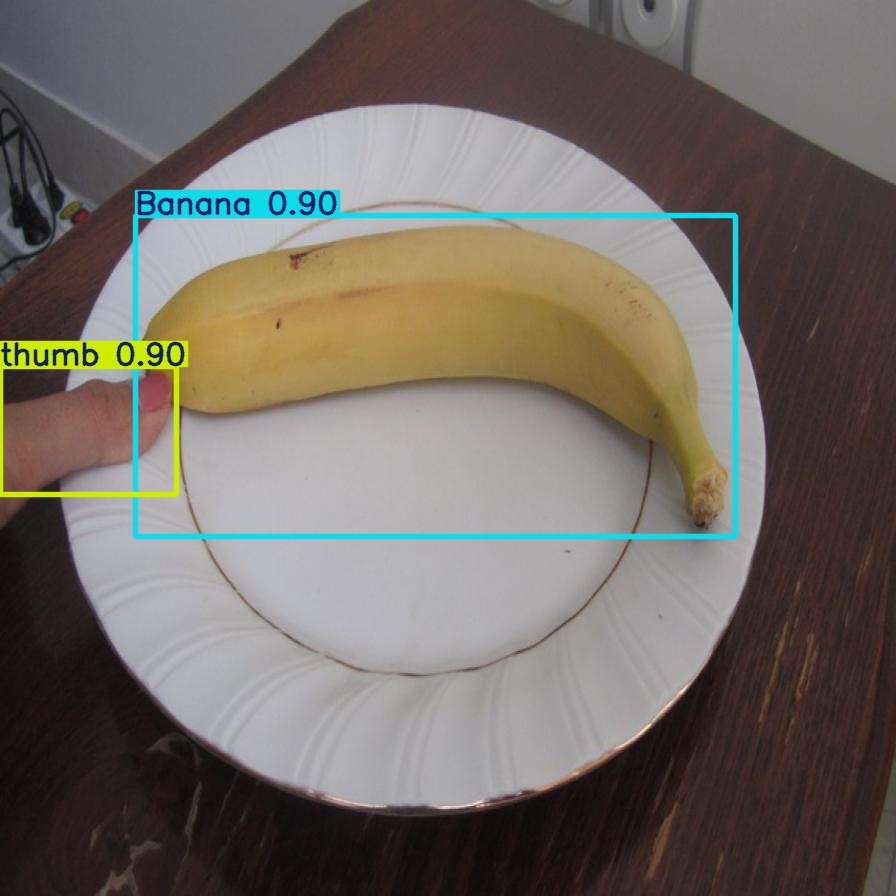

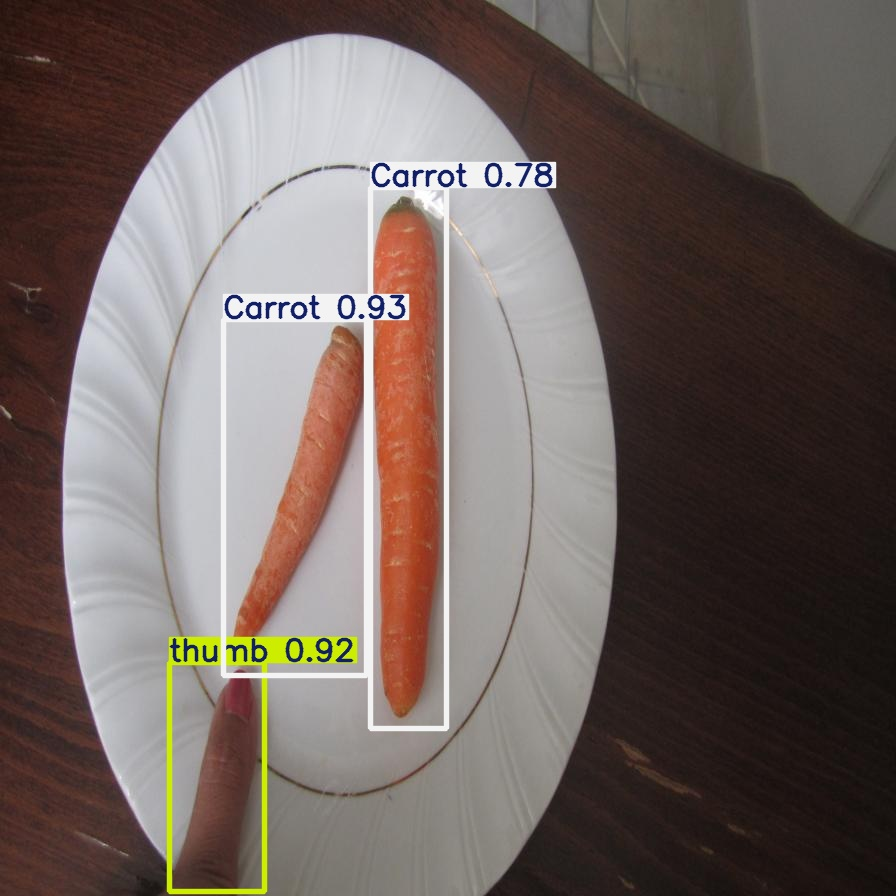

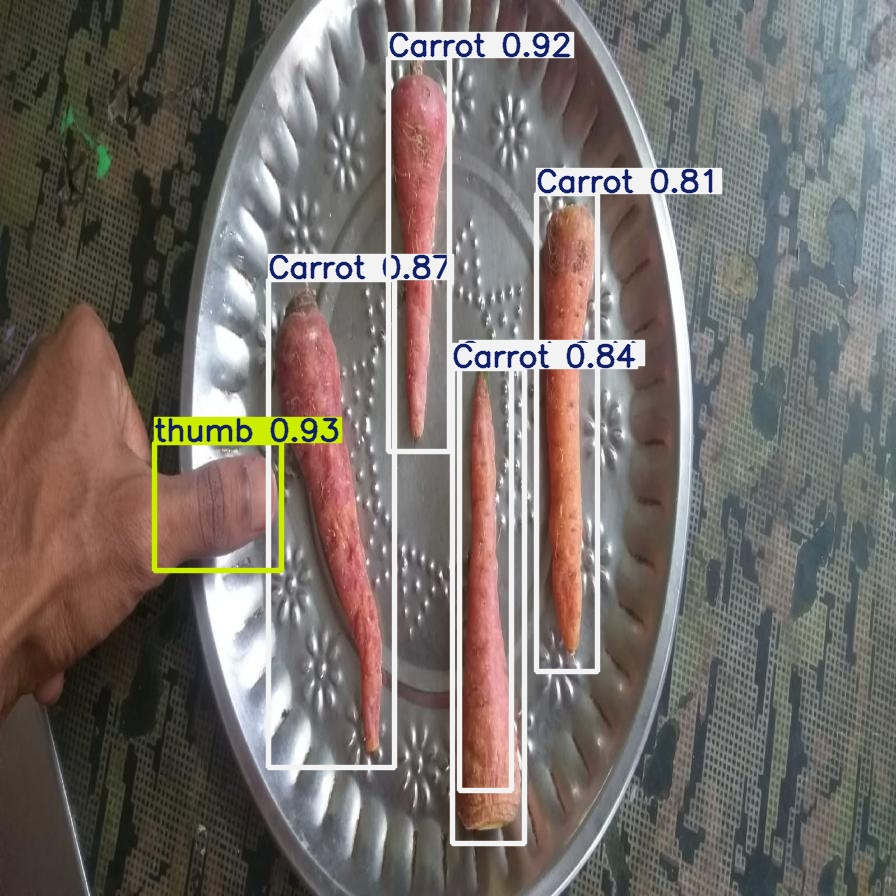

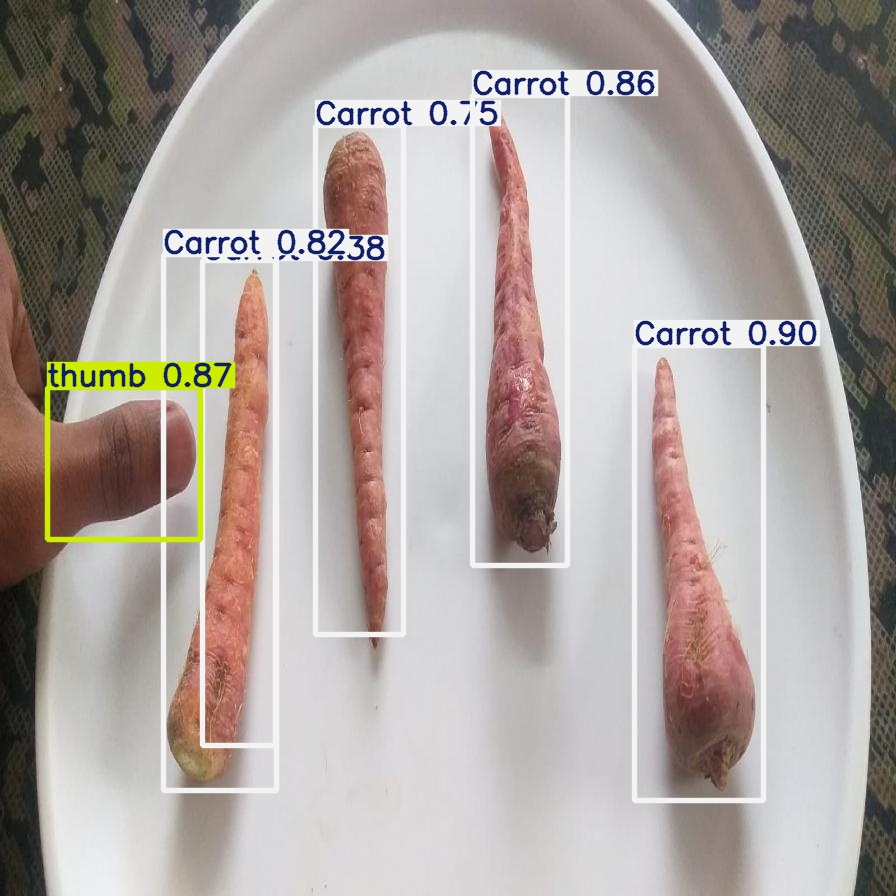

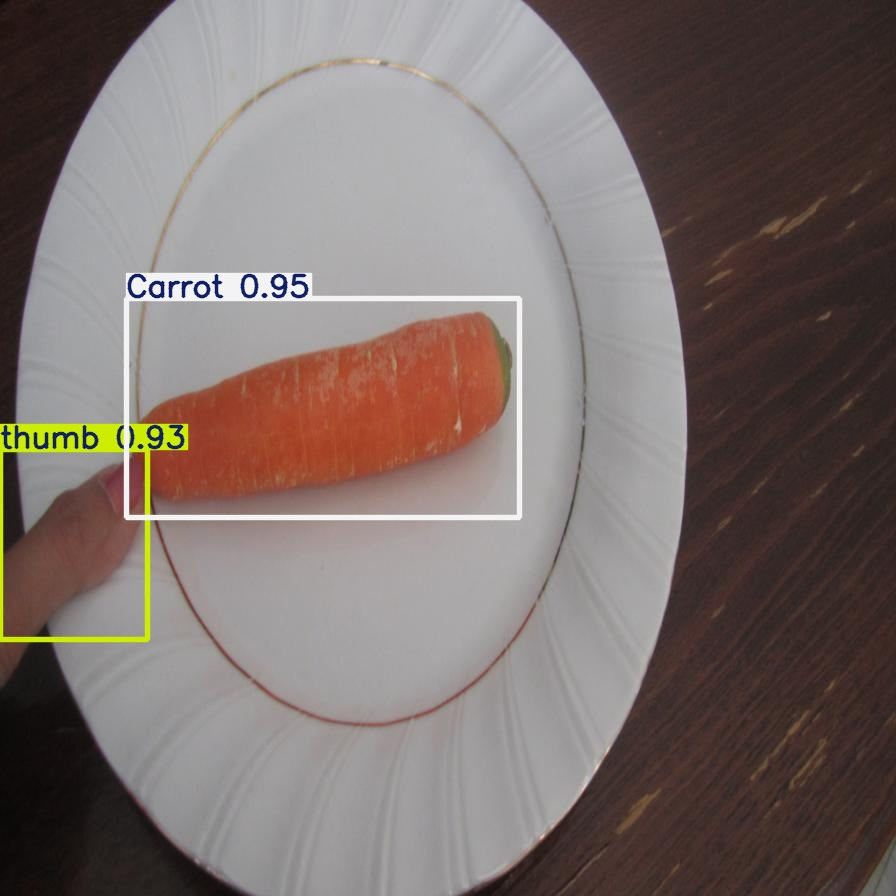

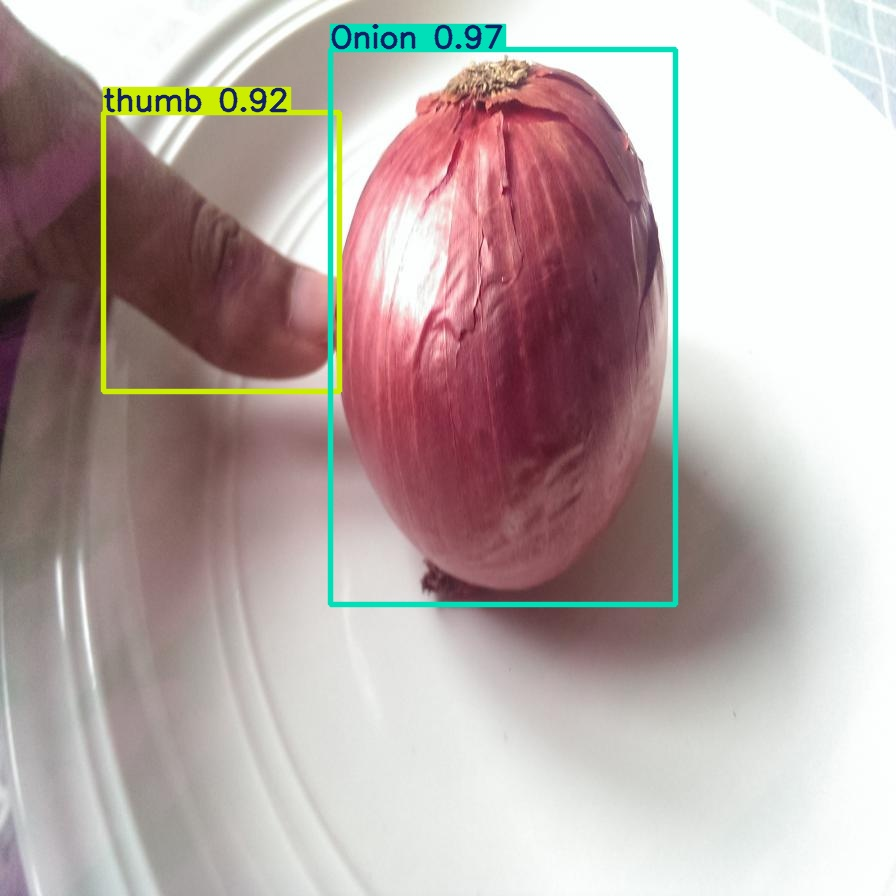

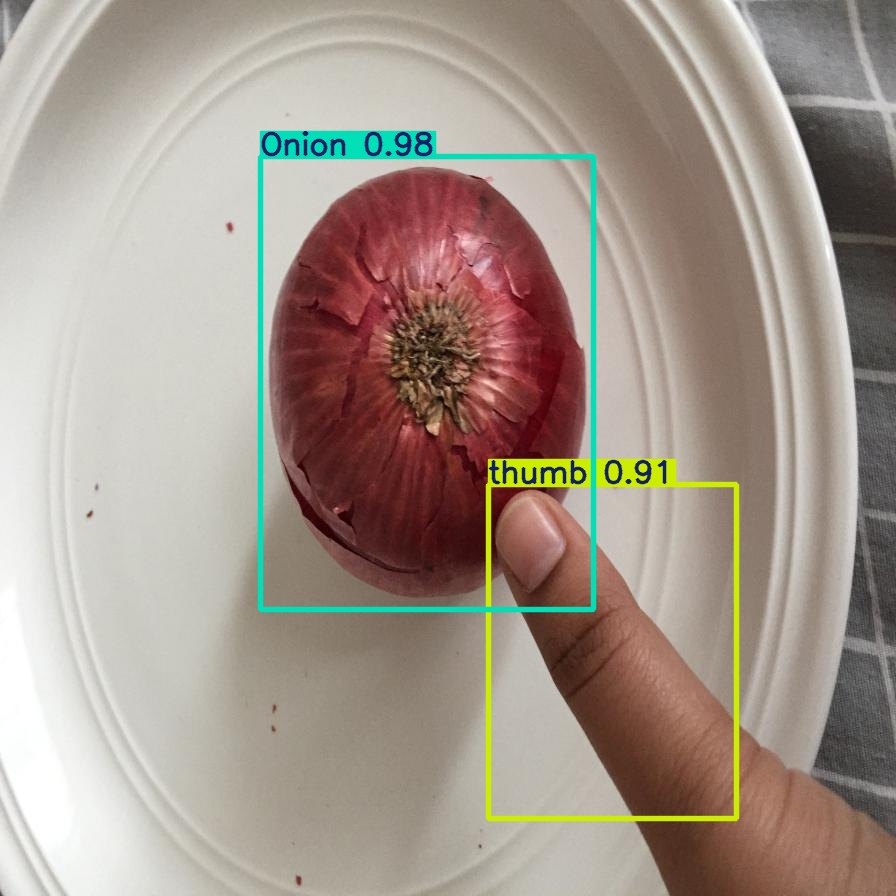

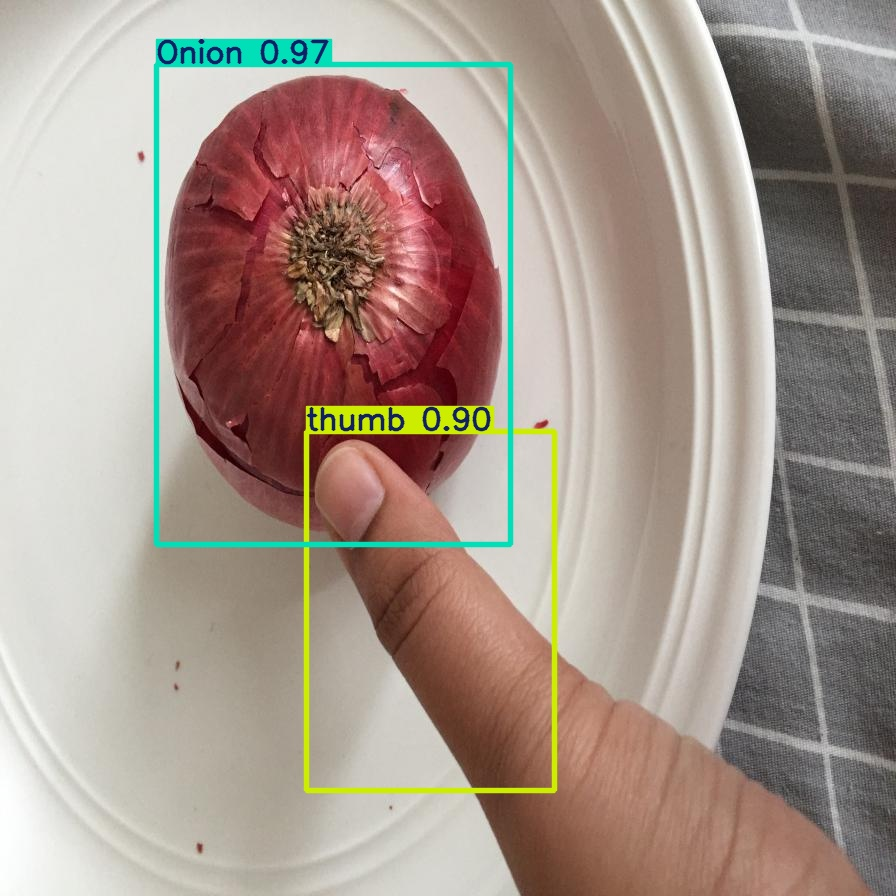

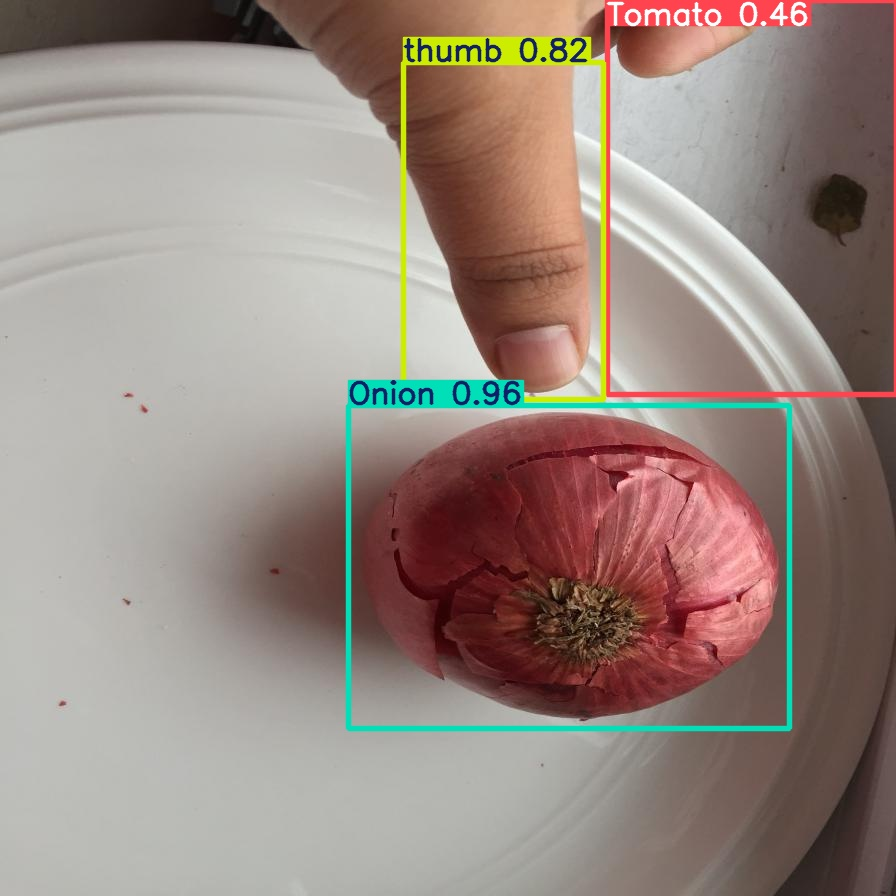

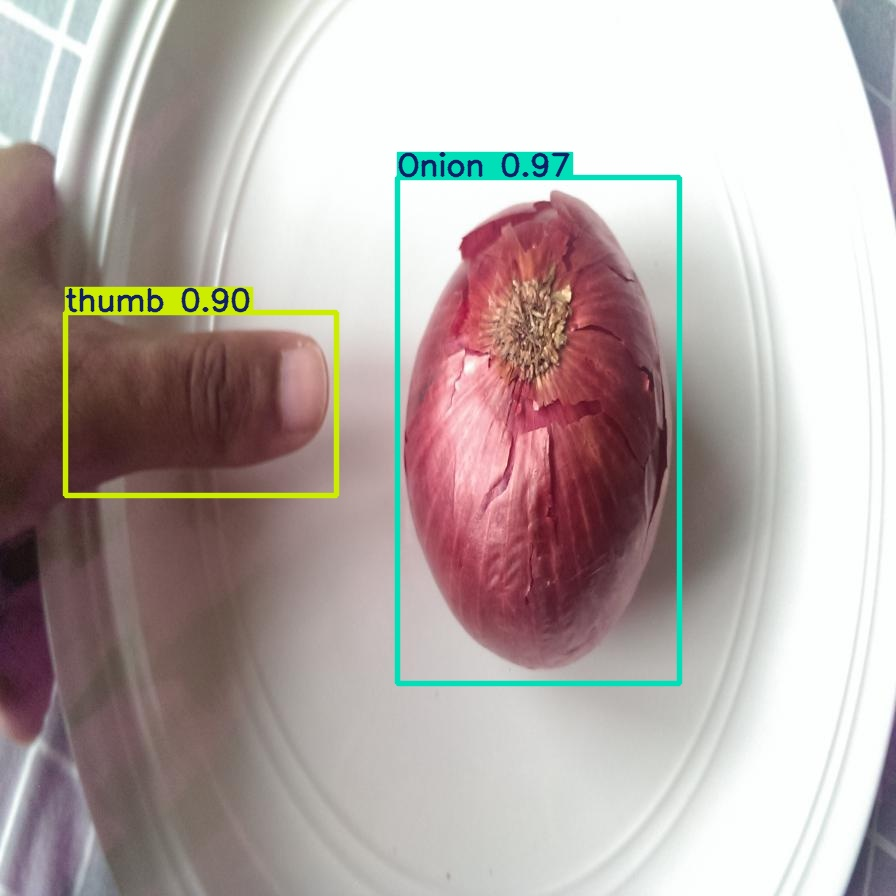

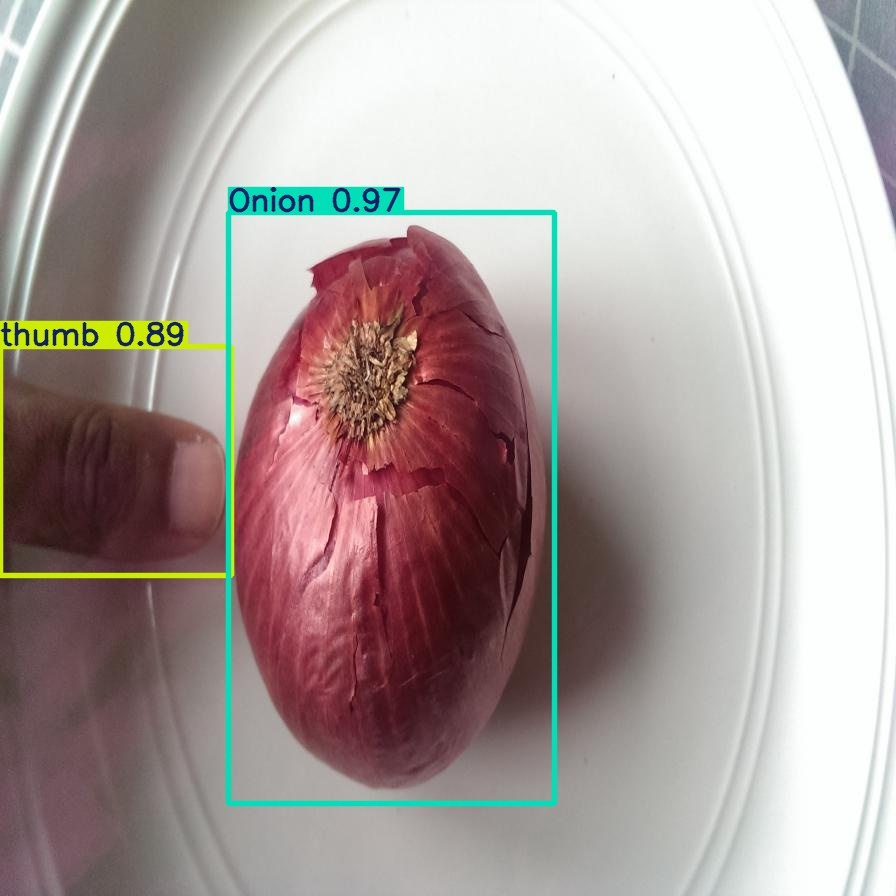

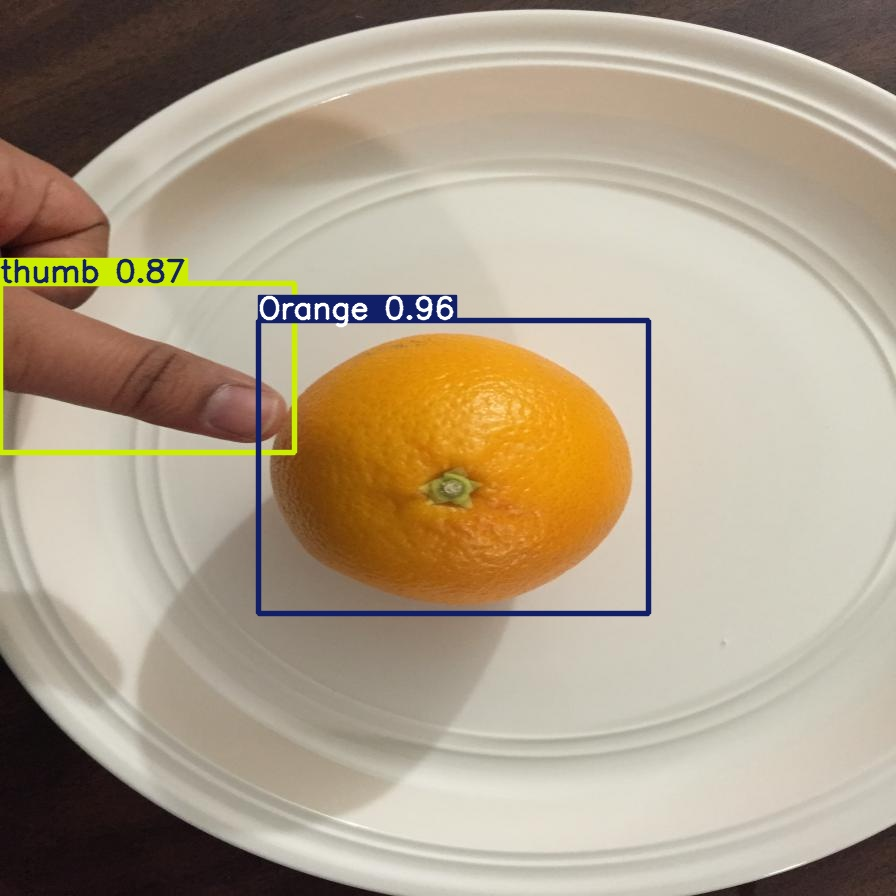

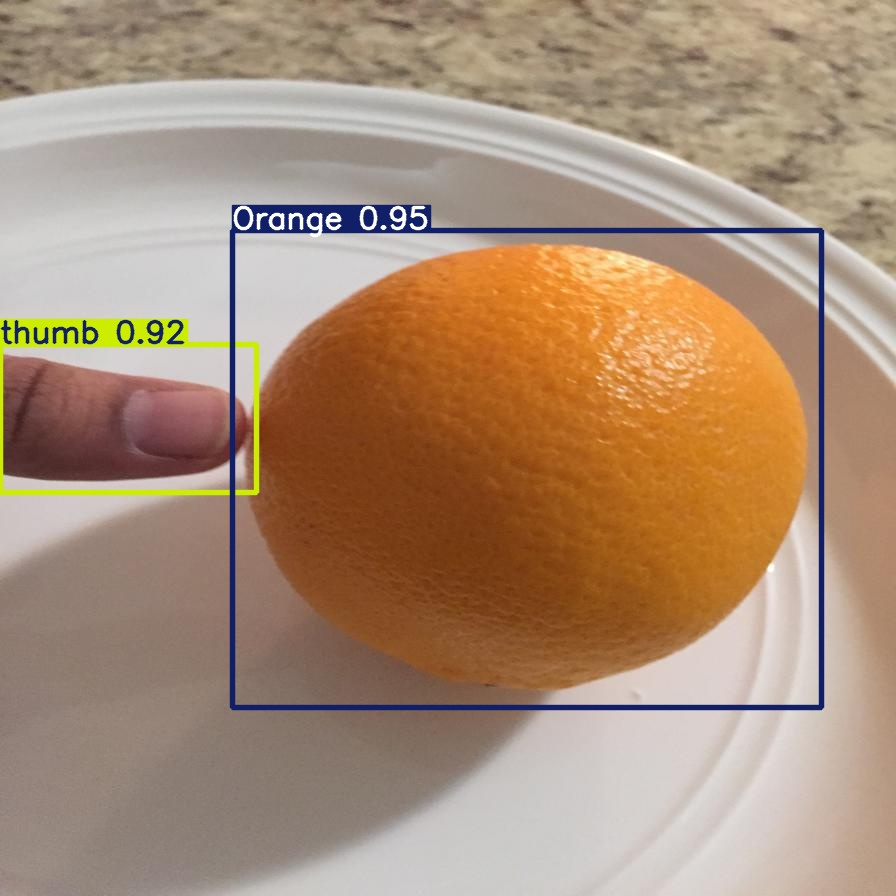

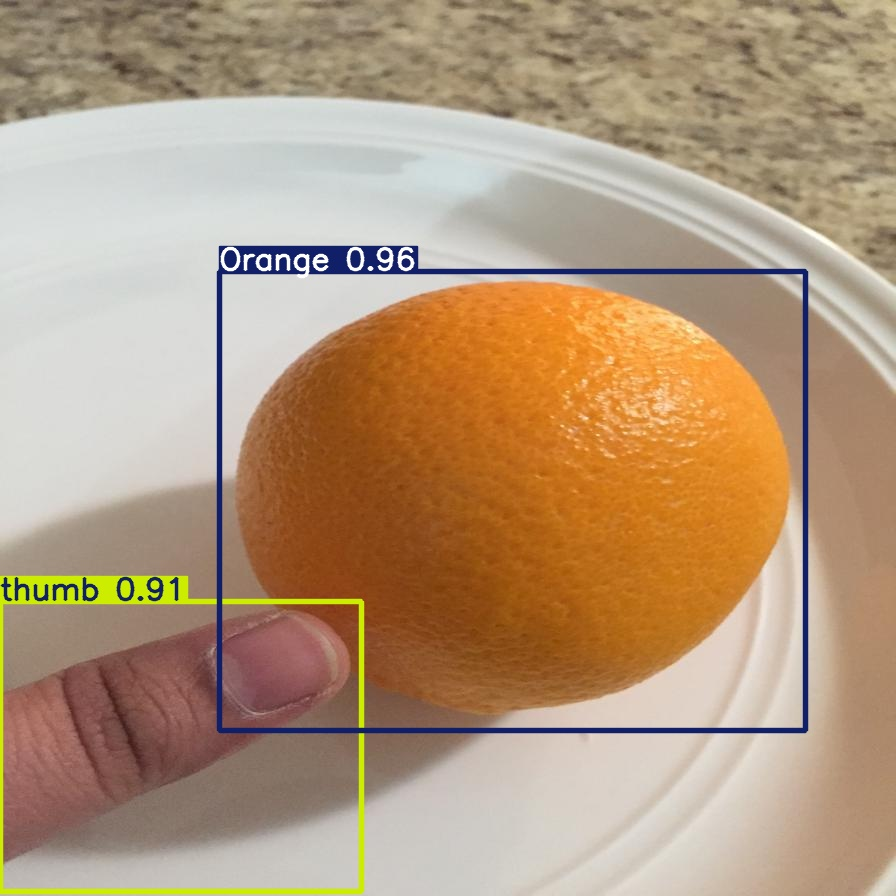

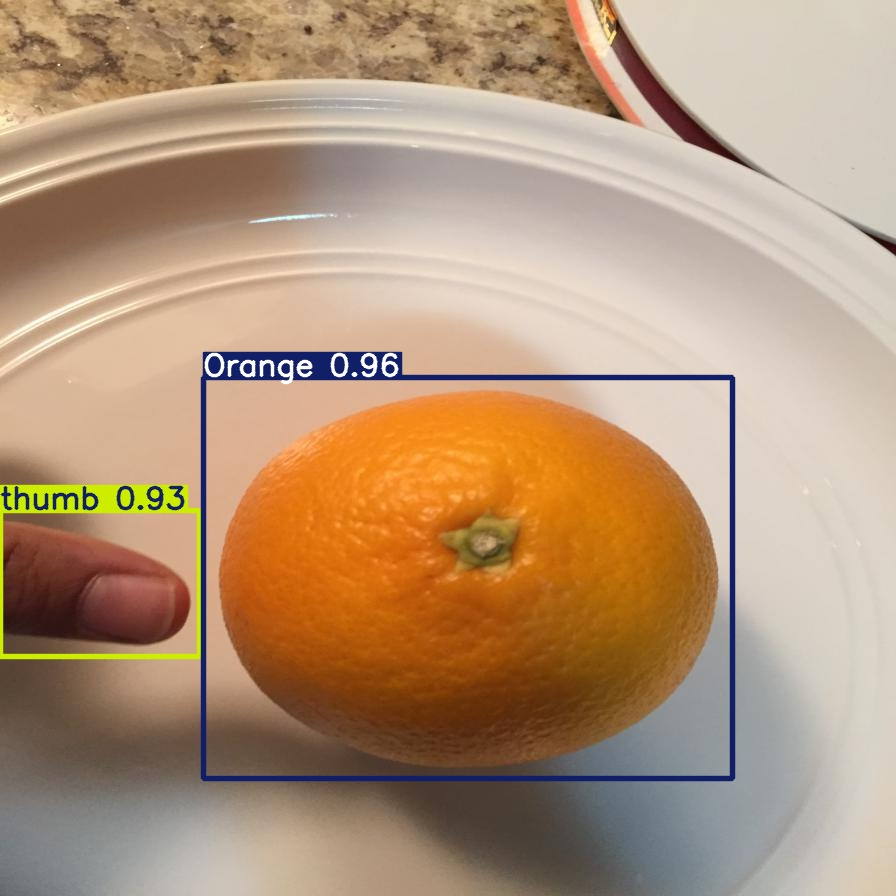

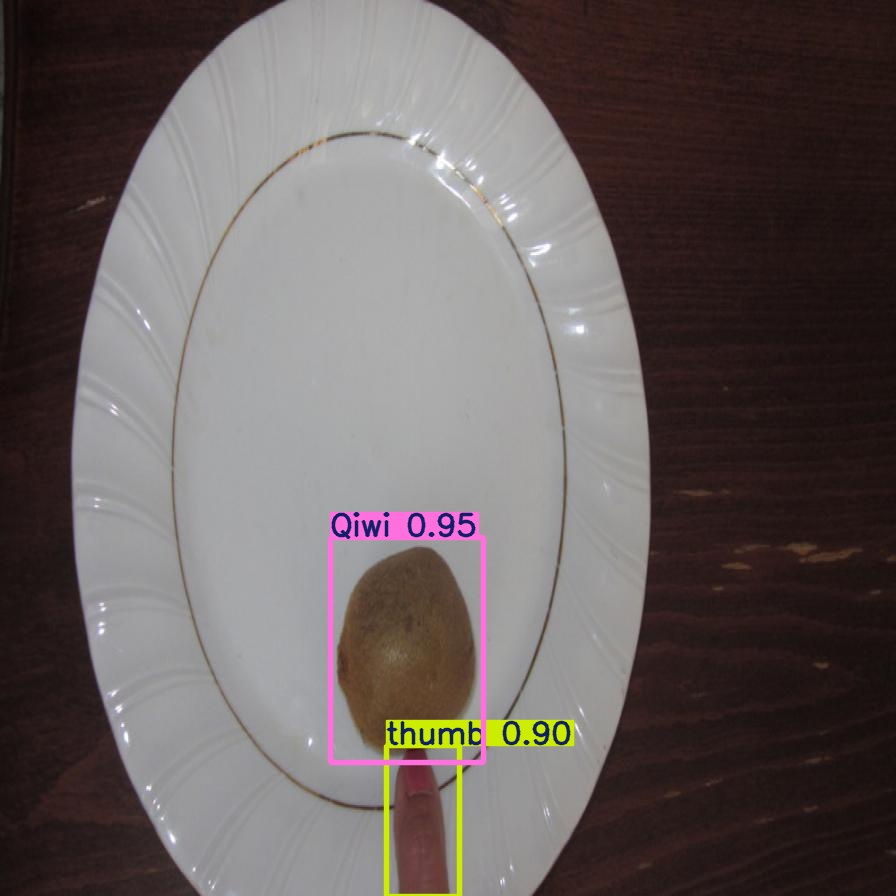

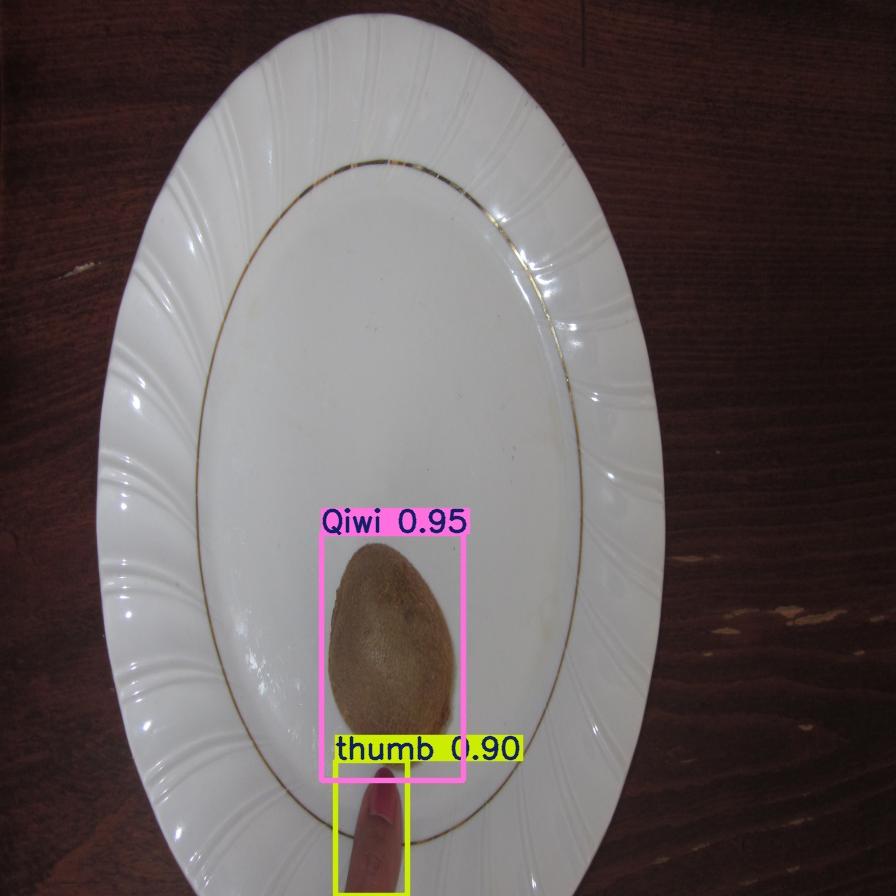

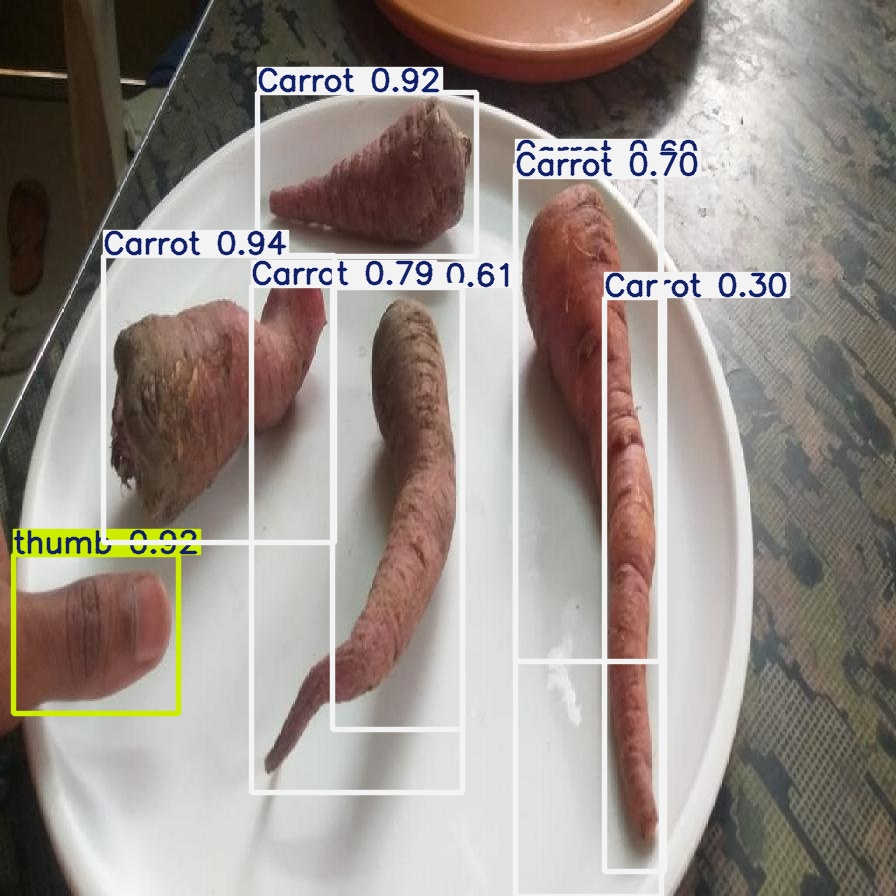

In [ ]:
import glob
from IPython.display import Image, display

for img_path in glob.glob(f'/content/drive/MyDrive/ProjectInternship/predict/*.jpg')[:]:
  display(Image(filename=img_path, width=600))
  print("\n")

In [ ]:
!yolo task=detect mode=predict model='/content/drive/MyDrive/ProjectInternship/train/weights/best.pt' conf=0.25 source='/content/drive/MyDrive/ProjectInternship/bbn.png' project='/content/drive/MyDrive/ProjectInternship'


Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/drive/MyDrive/ProjectInternship/bbn.png: 448x800 1 Banana, 1 thumb, 72.6ms
Speed: 4.2ms preprocess, 72.6ms inference, 676.9ms postprocess per image at shape (1, 3, 448, 800)
Results saved to /content/drive/MyDrive/ProjectInternship/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


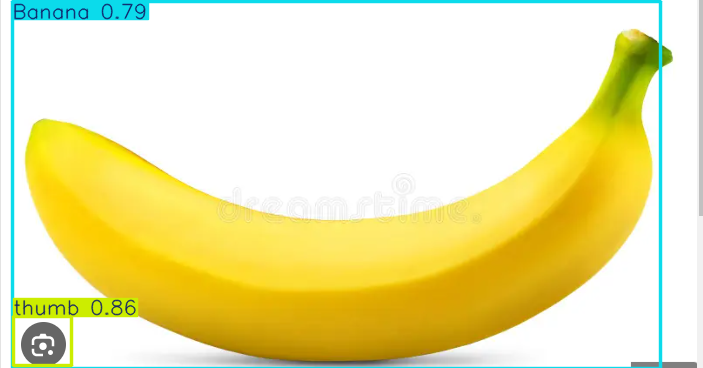

In [ ]:
import glob
from IPython.display import Image, display
display(Image(filename='/content/drive/MyDrive/ProjectInternship/predict2/bbn.png', width=600))
print("\n")